In [39]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns



In [40]:
data = pd.read_csv("boston_data.csv")

In [41]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [42]:
data.shape

(404, 14)

In [43]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [44]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


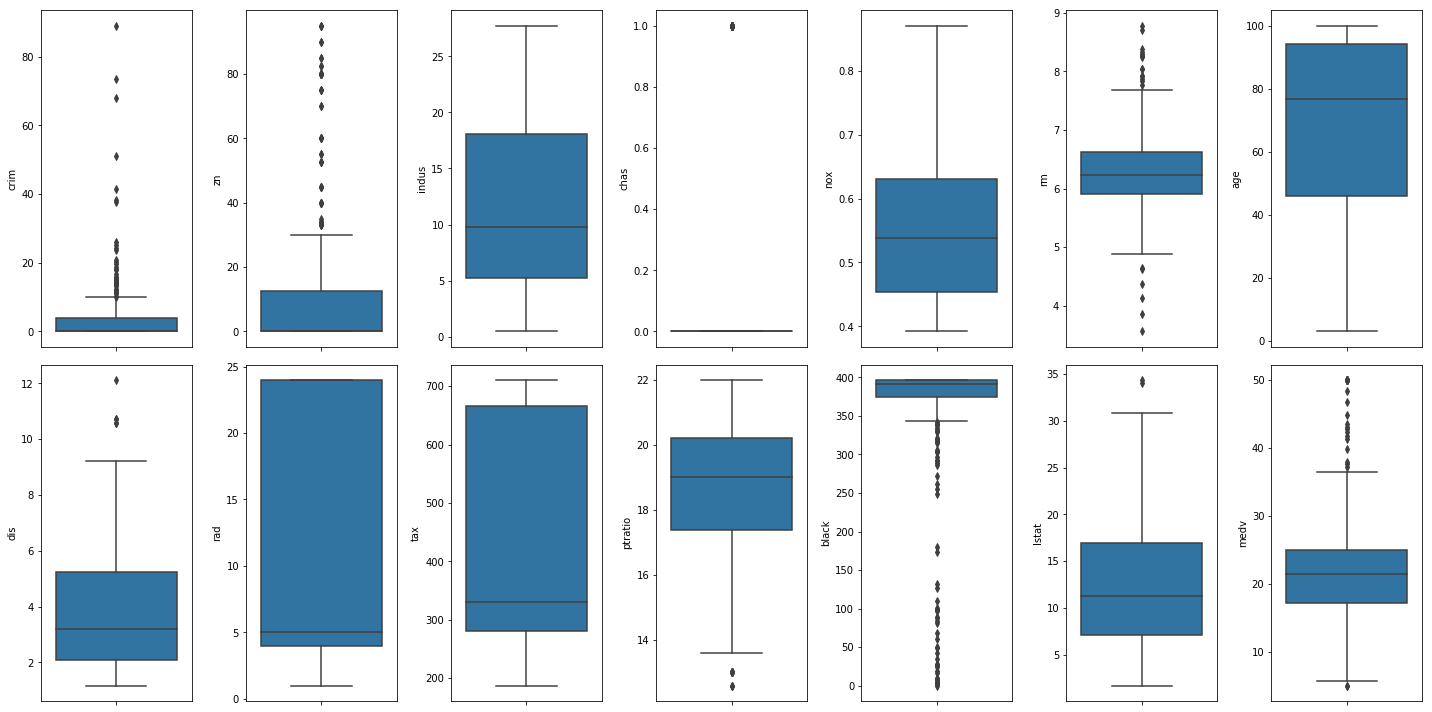

In [45]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
ind=0
ax=ax.flatten()

for col,value in data.items():
    sns.boxplot(y=col,data=data,ax=ax[ind])
    ind+=1
plt.tight_layout()

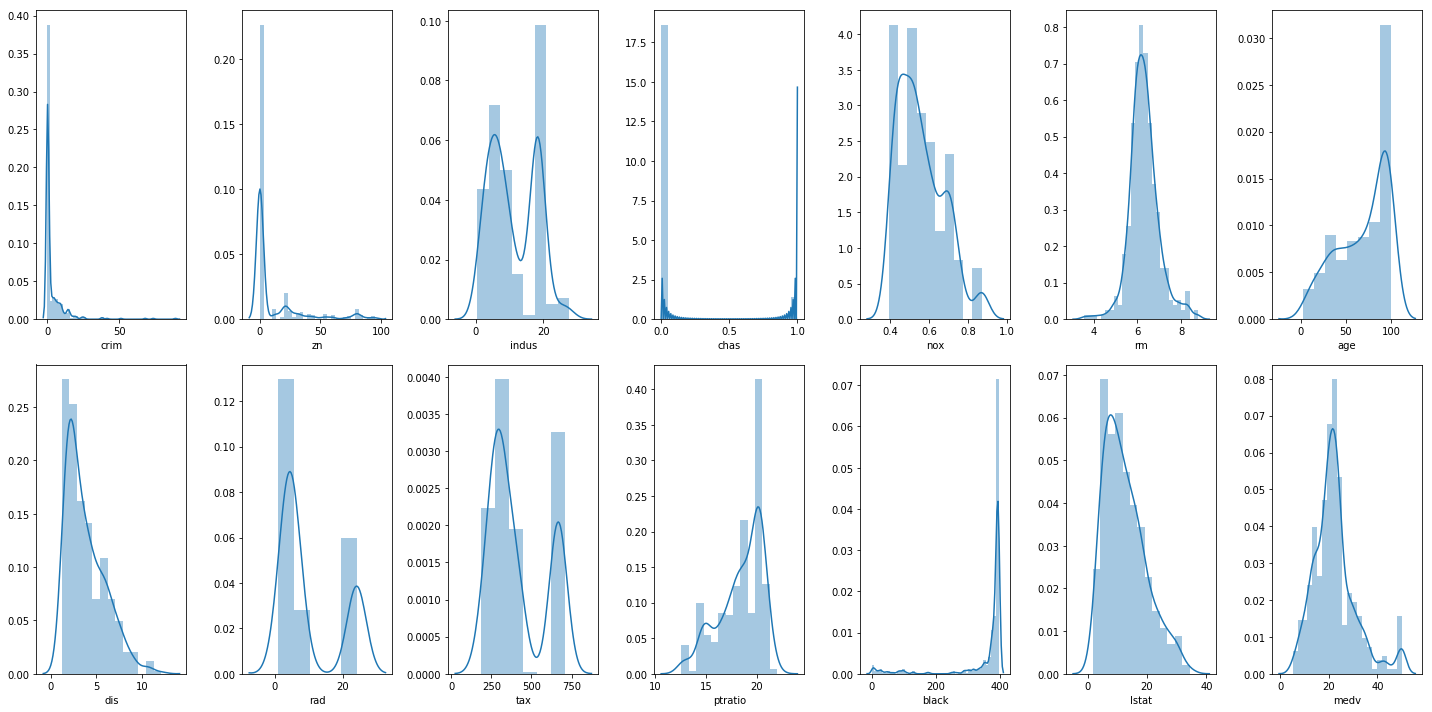

In [46]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
ind=0
ax=ax.flatten()

for col,value in data.items():
    sns.distplot(value,ax=ax[ind])
    ind+=1
plt.tight_layout()

In [47]:
x = data.iloc[:,:-1]
y= data.iloc[:,-1]

In [48]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43


In [49]:
y.head()

0    21.7
1    19.6
2    20.3
3    15.4
4    20.5
Name: medv, dtype: float64

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
x_scaled = scaler.fit_transform(x)

In [53]:
x_scaled

array([[-0.39988956, -0.47714971, -0.05581469, ...,  0.3517575 ,
         0.23175972, -0.39310312],
       [-0.40610035,  0.65785078, -0.89031483, ...,  0.58457209,
         0.44326188, -0.48852577],
       [-0.3785481 , -0.47714971, -0.18951101, ..., -0.02074586,
         0.43626832, -0.38009094],
       ...,
       [-0.41598186,  3.60885208, -1.46623746, ..., -2.25576597,
         0.42863899, -1.36467925],
       [-0.41536167,  3.38185198, -1.53528941, ..., -0.53293796,
         0.44326188, -0.98732602],
       [-0.40843331,  0.88485088, -0.91969864, ..., -0.8588784 ,
         0.25793258, -0.90202395]])

In [54]:
x.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.000000,-0.194770,0.404249,-0.060688,0.405290,-0.172226,0.349288,-0.376493,0.603044,0.565047,0.292092,-0.377436,0.428940
zn,-0.194770,1.000000,-0.532268,-0.037290,-0.497114,0.302404,-0.546587,0.659018,-0.311313,-0.289332,-0.371315,0.176350,-0.412075
indus,0.404249,-0.532268,1.000000,0.059928,0.760913,-0.353589,0.630048,-0.702583,0.616375,0.722828,0.356549,-0.378189,0.608309
chas,-0.060688,-0.037290,0.059928,1.000000,0.100650,0.090146,0.084852,-0.103124,-0.022561,-0.043708,-0.121835,0.042580,-0.041061
nox,0.405290,-0.497114,0.760913,0.100650,1.000000,-0.266114,0.728882,-0.762469,0.612115,0.660607,0.166715,-0.393876,0.587573
rm,-0.172226,0.302404,-0.353589,0.090146,-0.266114,1.000000,-0.210589,0.178700,-0.173222,-0.241733,-0.323330,0.128410,-0.578025
age,0.349288,-0.546587,0.630048,0.084852,0.728882,-0.210589,1.000000,-0.734915,0.467341,0.503830,0.231820,-0.276469,0.602001
dis,-0.376493,0.659018,-0.702583,-0.103124,-0.762469,0.178700,-0.734915,1.000000,-0.503471,-0.526938,-0.206016,0.306445,-0.500912
rad,0.603044,-0.311313,0.616375,-0.022561,0.612115,-0.173222,0.467341,-0.503471,1.000000,0.917344,0.487733,-0.468700,0.499279
tax,0.565047,-0.289332,0.722828,-0.043708,0.660607,-0.241733,0.503830,-0.526938,0.917344,1.000000,0.465997,-0.462250,0.542732


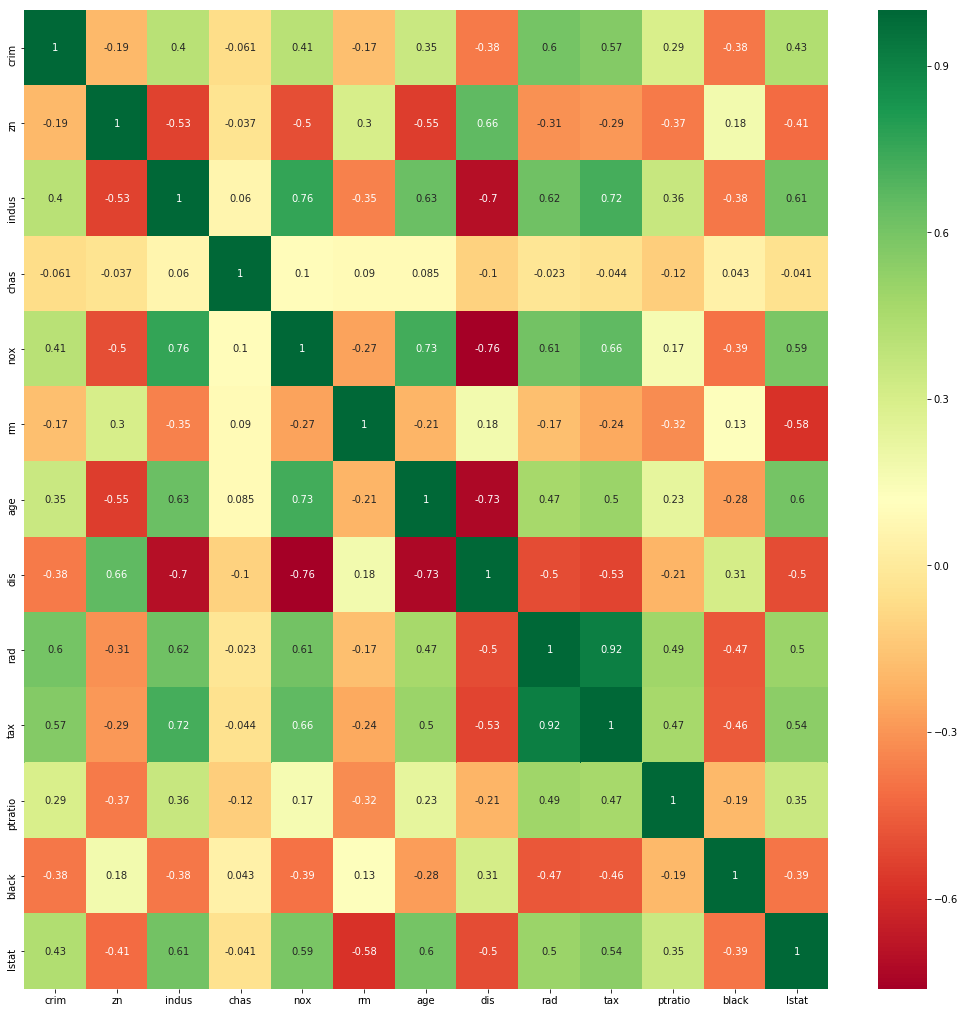

In [55]:
import seaborn as sns 
plt.figure(figsize = (18,18))
sns.heatmap(x.corr(),annot = True, cmap = "RdYlGn")

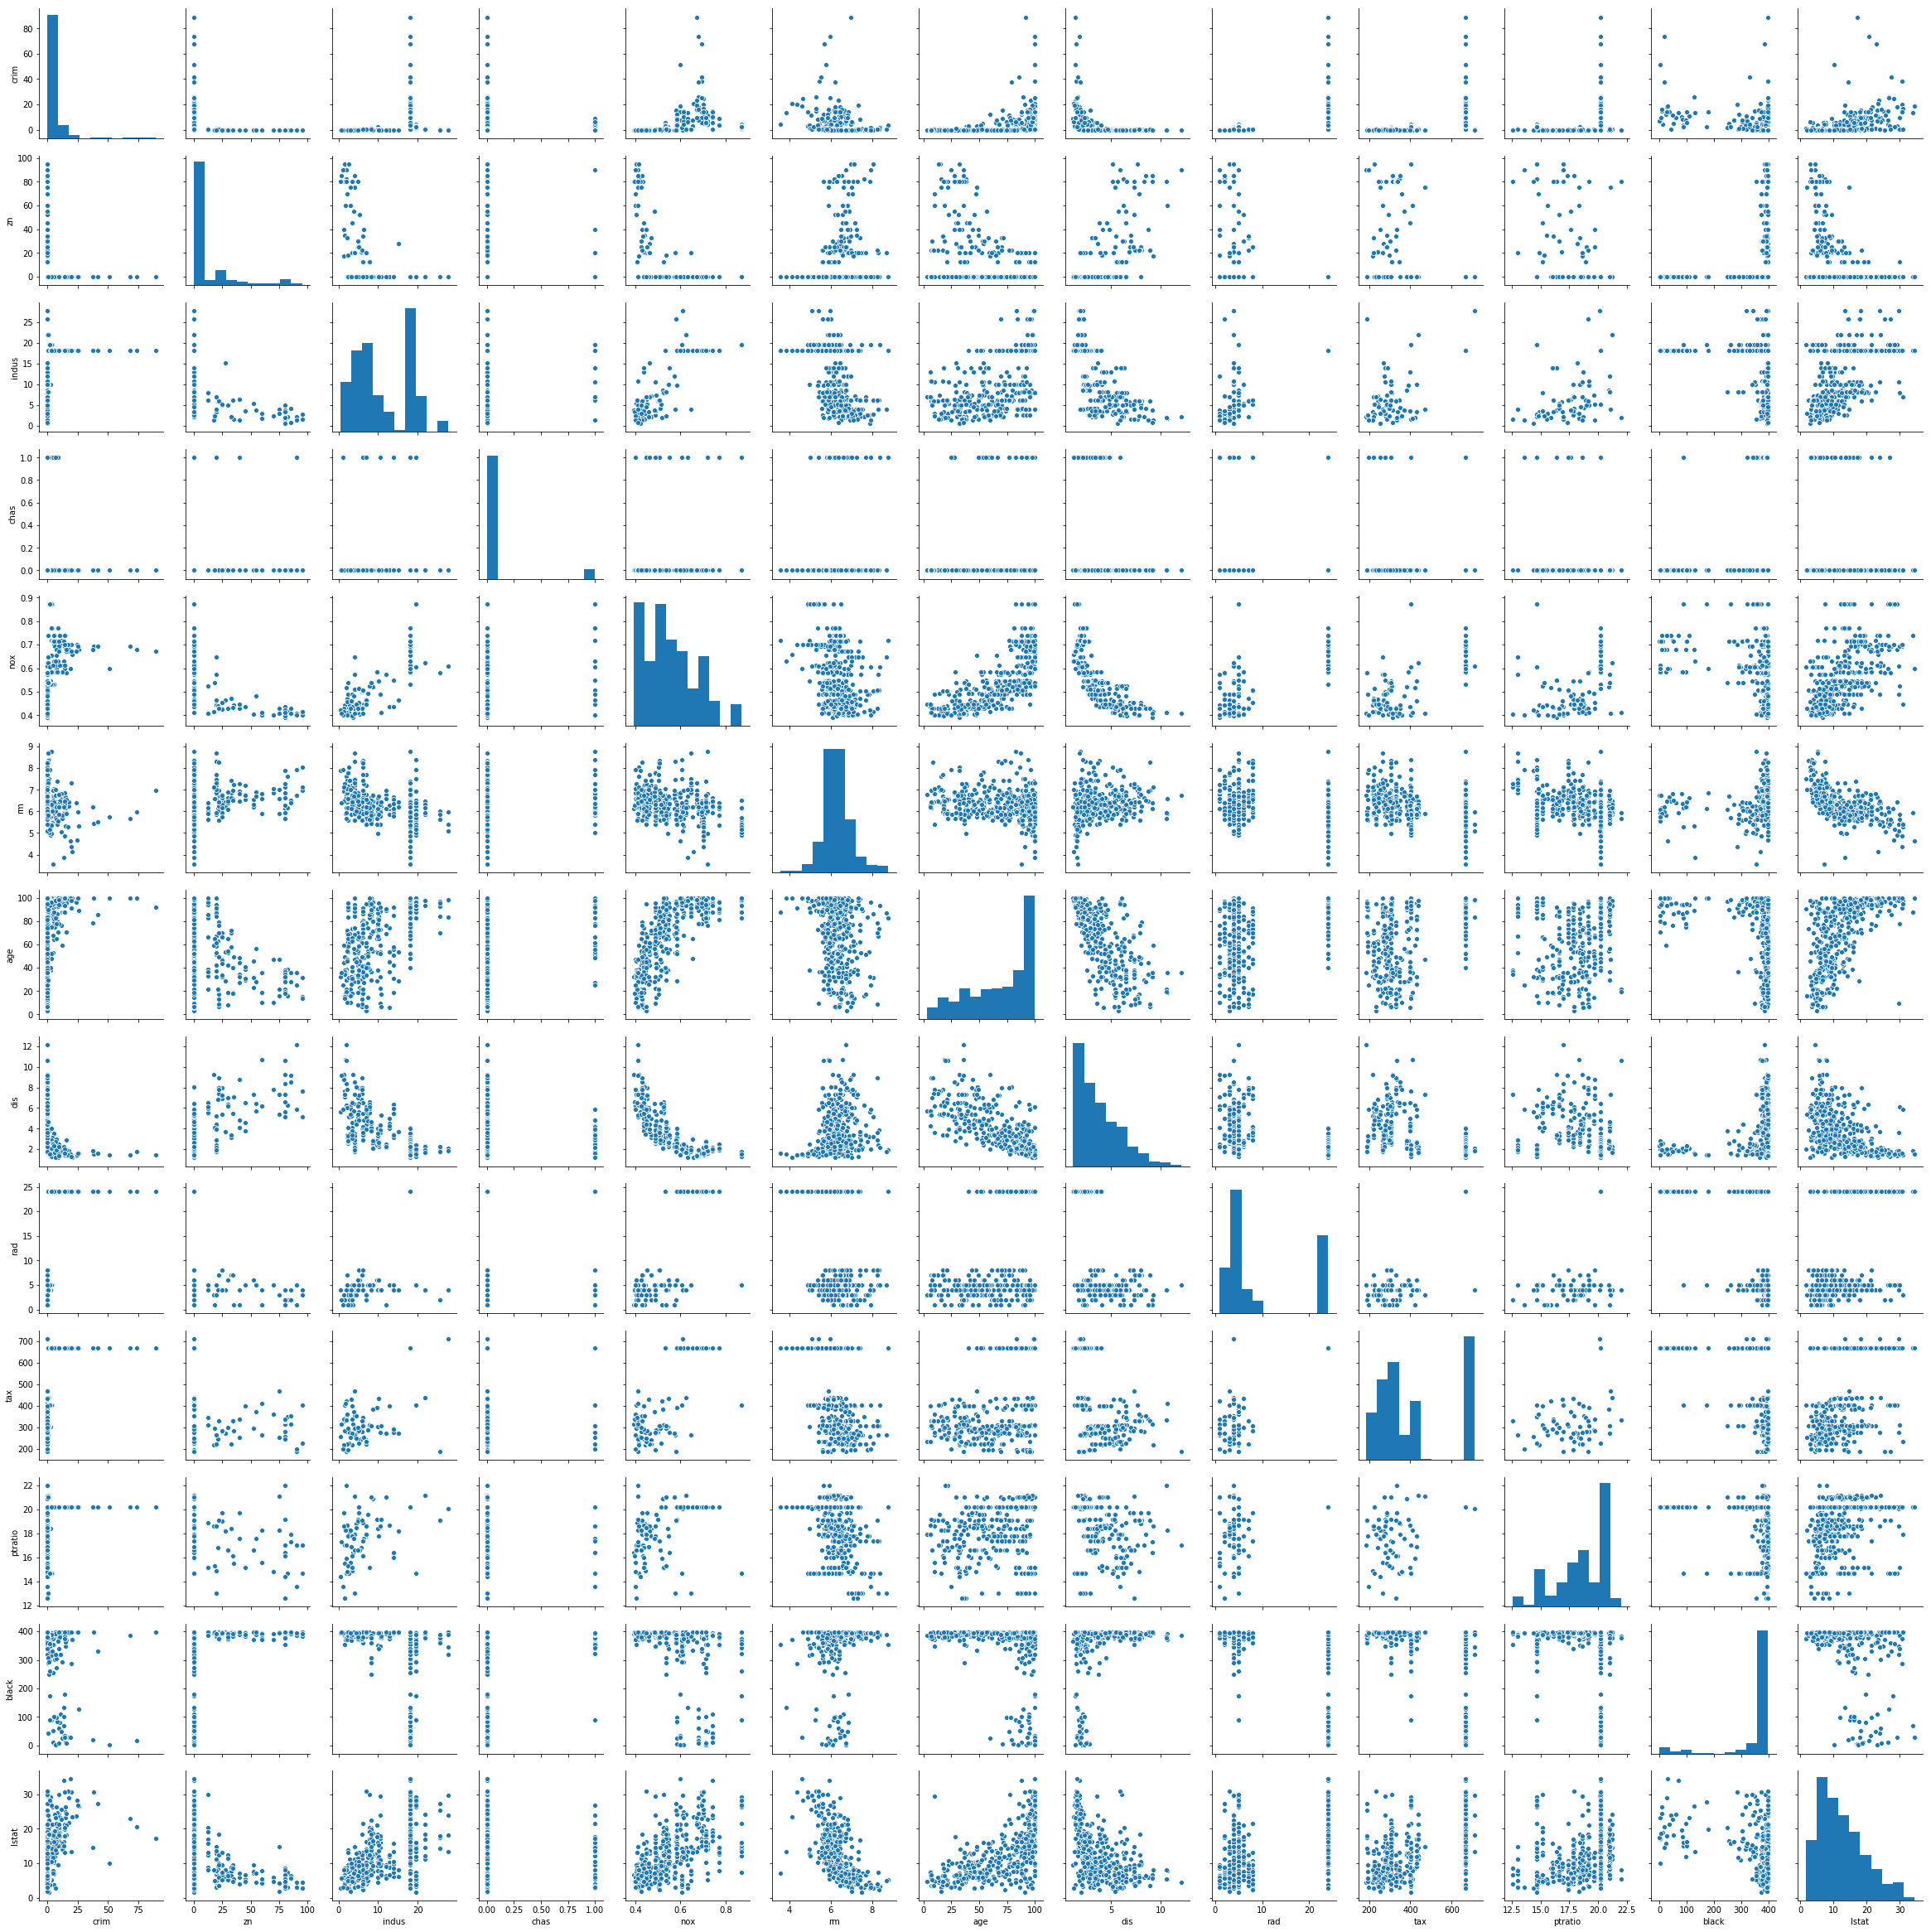

In [56]:
sns.pairplot(x)

In [57]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=100)

In [60]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [61]:
model.score(x_train,y_train)

0.7606396143503583

In [62]:
pred = model.predict(x_test)
pred

array([20.90652773, 14.11012725, 18.50337024, 15.9112006 , 23.98896867,
       20.11607908, 22.34438864, 19.88996041,  0.49893568, 34.09352276,
       25.83103407, 42.2397224 , 16.4667878 ,  5.30025565, 22.0574031 ,
       24.16021433, 27.72097396, 20.17433666, 23.67856838, 21.45153091,
       17.43254656, 18.202393  , 26.39028752, 19.76771147, 37.66796336,
       16.92608962, 36.01408101, 23.62995216,  9.31259472, 23.18584598,
       18.06500445, 31.11524891, 19.93946464, 21.40994197, 11.8209075 ,
       22.65664553, 19.39335568, 21.86891447, 25.52541627, 22.83387228,
       23.99052139, 39.20174147, 23.96154194, 26.99895824, 18.66417998,
       32.90026977, 25.98137319, 24.11369584, 13.87516379, 21.74325263,
       28.68414133, 23.4768956 , 17.71543671, 21.7810232 , 19.33223351,
       21.60612048, 15.3761869 , 17.64008573, 34.45084187, 19.642783  ,
       21.08318981, 22.04084979, 26.95984186, 14.61052198, 19.25321344,
       25.3650733 , 25.43560679, 30.0170104 , 14.08221314, 30.30

In [63]:
model.score(x_test,y_test)

0.7091338317984024

In [64]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [65]:
mean_squared_error(y_test,pred)

21.40873597631403

In [66]:
mean_absolute_error(y_test,pred)

2.887150610901162

In [67]:
np.sqrt(mean_squared_error(y_test,pred))

4.62695752912365

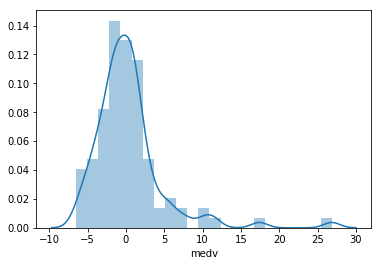

In [68]:
sns.distplot(y_test-pred)

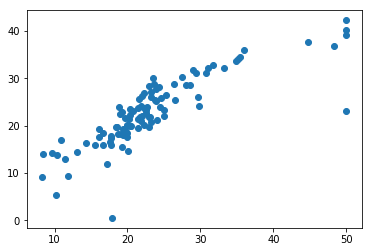

In [69]:
plt.scatter(y_test,pred)

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
cv_score = cross_val_score(model,x_scaled,y,cv=5)
cvs = np.abs(np.mean(cv_score))

In [72]:
cvs

0.7228675323903666

# Random Forest to predict Price

In [73]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf = RandomForestRegressor()
rf

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
rf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [76]:
rf.score(x_train,y_train)

0.971172293193381

In [77]:
rpred = rf.predict(x_test)
rpred

array([19.7 , 13.57, 16.95, 18.45, 21.16, 20.85, 19.05, 20.83,  8.98,
       42.68, 25.27, 44.04, 18.3 ,  8.65, 27.07, 22.17, 34.42, 22.27,
       22.77, 18.78, 14.8 , 19.33, 24.67, 19.86, 45.37, 12.43, 44.53,
       25.19, 14.71, 25.07, 15.35, 27.74, 19.58, 18.8 , 11.33, 19.73,
       19.35, 19.3 , 22.51, 19.87, 19.45, 47.93, 23.16, 24.65, 18.5 ,
       33.22, 32.6 , 22.97, 16.72, 19.55, 23.37, 23.1 , 18.57, 22.12,
       19.61, 21.15, 16.54, 17.59, 36.04, 19.18, 23.22, 20.17, 24.16,
       19.39, 19.73, 23.29, 25.99, 27.64, 11.26, 24.1 ,  9.54, 25.73,
       10.32, 23.74, 18.79, 33.22, 34.81, 32.95, 22.  , 46.63, 23.95,
       15.02, 28.21, 26.42, 22.7 , 18.46,  8.6 , 18.97, 16.94, 20.14,
       16.87, 22.76, 21.24, 29.05, 22.73, 24.9 , 24.24, 20.22, 21.47,
       14.53, 43.19])

In [78]:
rf.score(x_test,y_test)

0.7532640142782068

In [80]:
print("MSE:",mean_squared_error(y_test,rpred))
print("MAE:",mean_absolute_error(y_test,rpred))

MSE: 18.16060495049505
MAE: 2.6290099009900993


In [93]:
estimators = [int(x) for x in np.linspace(100,1200,7)]
features = ['auto','sqrt','log2']
depth = [int(x) for x in np.linspace(5,30,6)]
min_sample_split =[2,5,15,30,100]
min_sample_leaf = [1,2,4,12]

In [94]:
random_grid = {'n_estimators': estimators,
               'max_features': features,
               'max_depth': depth,
               'min_samples_split': min_sample_split,
               'min_samples_leaf': min_sample_leaf}

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [144]:
rf_r = RandomizedSearchCV(estimator=rf,param_distributions=random_grid, n_iter = 15, cv = 6, random_state=77, n_jobs = 1)

In [145]:
rf_r.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=6, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=15, n_jobs=1,
          param_distributions={'n_estimators': [100, 283, 466, 650, 833, 1016, 1200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 15, 30, 100], 'min_samples_leaf': [1, 2, 4, 12]},
          pre_dispatch='2*n_jobs', random_state=77, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [146]:
rf_r.best_params_

{'n_estimators': 833,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10}

In [147]:
rf_r.score(x_train,y_train)

0.9598143630207329

In [148]:
rfpred = rf_r.predict(x_test)

In [149]:
rfpred

array([20.58748468, 13.11395474, 14.0414658 , 17.61412624, 21.97467636,
       21.37183107, 20.42196803, 21.74974278, 12.40040076, 34.89585529,
       25.46276484, 40.56061385, 19.96715111,  9.46061873, 22.97037989,
       24.2431447 , 30.04291167, 20.5897267 , 22.79317305, 19.86014676,
       16.11964451, 20.5869656 , 24.74479616, 20.7214179 , 40.29201055,
       11.63120492, 36.223084  , 23.58103479, 15.66445249, 24.94629159,
       16.23069759, 27.29406312, 19.43912058, 18.15907687, 13.51154967,
       21.50074911, 18.79461824, 20.41363129, 23.25343876, 20.84516564,
       20.75491081, 44.56675909, 22.52581743, 24.62022467, 20.04584701,
       34.6830027 , 32.36866091, 23.94959899, 16.44389867, 21.8785339 ,
       24.48619963, 23.05897805, 19.64193971, 21.82454405, 19.96146483,
       21.64572631, 19.98498469, 16.95775264, 34.08305433, 18.81078377,
       24.57021122, 20.80127425, 24.28514598, 18.36892731, 19.69764235,
       24.01696969, 26.10834217, 27.49903941, 13.41966545, 26.72

In [150]:
r2_score(y_test,rfpred)

0.786597871770164

In [151]:
rf_r.score(x_test,y_test)

0.786597871770164